In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("Netflix Userbase.csv")

In [3]:
df = data.copy()

In [4]:
df.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month


In [5]:
# Taking data overview by using info. 
# Understanding the data, its type and number of rows and columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   User ID            2500 non-null   int64 
 1   Subscription Type  2500 non-null   object
 2   Monthly Revenue    2500 non-null   int64 
 3   Join Date          2500 non-null   object
 4   Last Payment Date  2500 non-null   object
 5   Country            2500 non-null   object
 6   Age                2500 non-null   int64 
 7   Gender             2500 non-null   object
 8   Device             2500 non-null   object
 9   Plan Duration      2500 non-null   object
dtypes: int64(3), object(7)
memory usage: 195.4+ KB


The columns join date and last payment date should be in datetime format

In [6]:
# Converting the datatype of columns from object to datetime

df["Join Date"] = pd.DatetimeIndex(df["Join Date"])
df["Last Payment Date"] = pd.DatetimeIndex(df["Last Payment Date"])

In [7]:
df.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,2022-01-15,2023-10-06,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,2021-05-09,2023-06-22,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,2023-02-28,2023-06-27,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,2022-10-07,2023-06-26,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,2023-01-05,2023-06-28,Germany,33,Male,Smartphone,1 Month


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   User ID            2500 non-null   int64         
 1   Subscription Type  2500 non-null   object        
 2   Monthly Revenue    2500 non-null   int64         
 3   Join Date          2500 non-null   datetime64[ns]
 4   Last Payment Date  2500 non-null   datetime64[ns]
 5   Country            2500 non-null   object        
 6   Age                2500 non-null   int64         
 7   Gender             2500 non-null   object        
 8   Device             2500 non-null   object        
 9   Plan Duration      2500 non-null   object        
dtypes: datetime64[ns](2), int64(3), object(5)
memory usage: 195.4+ KB


In [9]:
# Can see that Plan duration column has 1 month, here we can consider to convert all the 
# values in month format and to make it as numerical column.

df["Plan Duration"].value_counts()

Plan Duration
1 Month    2500
Name: count, dtype: int64

In Plan duration column all the values are of 1 Month only, We does not need this column
in any analysis. Dropping this column

In [10]:
df.drop("Plan Duration", axis=1, inplace=True)

In [11]:
df.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device
0,1,Basic,10,2022-01-15,2023-10-06,United States,28,Male,Smartphone
1,2,Premium,15,2021-05-09,2023-06-22,Canada,35,Female,Tablet
2,3,Standard,12,2023-02-28,2023-06-27,United Kingdom,42,Male,Smart TV
3,4,Standard,12,2022-10-07,2023-06-26,Australia,51,Female,Laptop
4,5,Basic,10,2023-01-05,2023-06-28,Germany,33,Male,Smartphone


In [12]:
Total_Monthly_Revenue = df["Monthly Revenue"].sum()
print("Total Revenue : ",Total_Monthly_Revenue,"$")

Total Revenue :  31271 $


### Total Revenue :  31271 $

In [13]:
df.sort_values("Monthly Revenue", ascending=False)[["User ID", "Monthly Revenue"]].head(10)

,User ID,Monthly Revenue
864,865,15
850,851,15
2452,2453,15
9,10,15
2499,2500,15
5,6,15
1,2,15
1671,1672,15
856,857,15
2494,2495,15


In [14]:
# Checking Subscription Type
df["Subscription Type"].value_counts()

Subscription Type
Basic       999
Standard    768
Premium     733
Name: count, dtype: int64

In [15]:
rev_sub_type = df.groupby("Subscription Type")["Monthly Revenue"].sum()

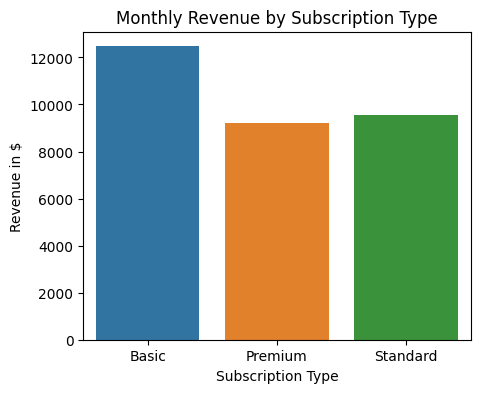

In [16]:
plt.figure(figsize=(5,4))
plt.title("Monthly Revenue by Subscription Type")
sns.barplot(x=rev_sub_type.index, y=rev_sub_type.values,
           hue=rev_sub_type.index, legend=False)
plt.ylabel("Revenue in $")
plt.show()

In [17]:
rev_contries = df.groupby("Country")["Monthly Revenue"].sum()

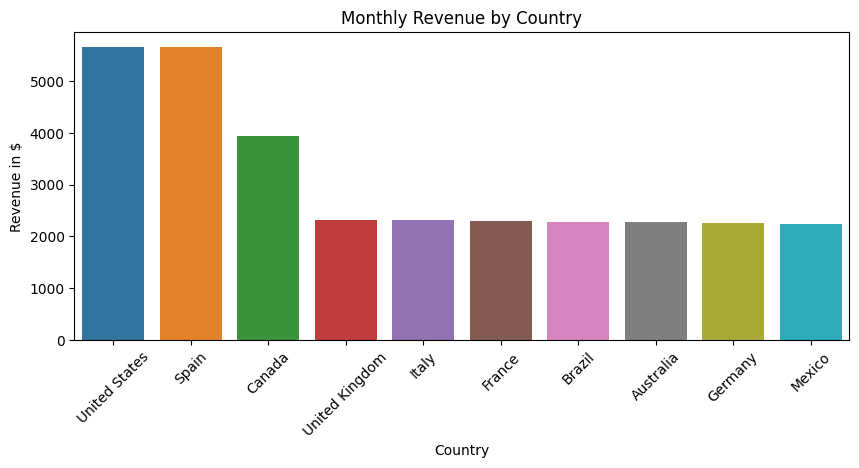

In [18]:
rev_contries = rev_contries.sort_values(ascending=False)

plt.figure(figsize=(10,4))
plt.title("Monthly Revenue by Country")
sns.barplot(x=rev_contries.index, y=rev_contries.values,
           hue=rev_contries.index, legend=False)
plt.ylabel("Revenue in $")
plt.xticks(rotation=45)
plt.show()

In [19]:
df.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device
0,1,Basic,10,2022-01-15,2023-10-06,United States,28,Male,Smartphone
1,2,Premium,15,2021-05-09,2023-06-22,Canada,35,Female,Tablet
2,3,Standard,12,2023-02-28,2023-06-27,United Kingdom,42,Male,Smart TV
3,4,Standard,12,2022-10-07,2023-06-26,Australia,51,Female,Laptop
4,5,Basic,10,2023-01-05,2023-06-28,Germany,33,Male,Smartphone


In [20]:
df["Age"].value_counts()

Age
39    116
30    116
31    115
28    115
41    114
47    111
37    107
35    105
29    104
40    103
42    102
48    101
36     99
46     99
49     97
43     94
51     93
33     93
32     92
45     89
38     89
34     88
27     87
44     86
50     84
26      1
Name: count, dtype: int64

In [21]:
df["Age"] = pd.cut(df["Age"], bins=3, labels=["25-34", "34-42", "42-51"])

In [22]:
df.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device
0,1,Basic,10,2022-01-15,2023-10-06,United States,25-34,Male,Smartphone
1,2,Premium,15,2021-05-09,2023-06-22,Canada,34-42,Female,Tablet
2,3,Standard,12,2023-02-28,2023-06-27,United Kingdom,34-42,Male,Smart TV
3,4,Standard,12,2022-10-07,2023-06-26,Australia,42-51,Female,Laptop
4,5,Basic,10,2023-01-05,2023-06-28,Germany,25-34,Male,Smartphone


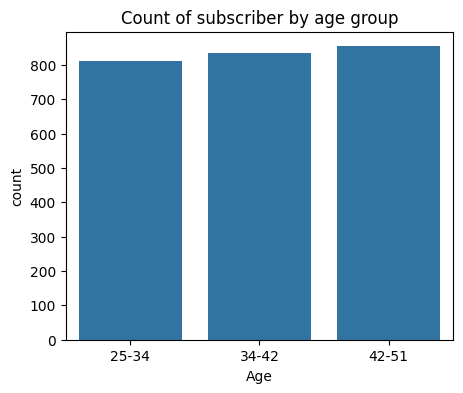

In [23]:
plt.figure(figsize=(5,4))
plt.title("Count of subscriber by age group")
sns.countplot(x=df["Age"])
plt.show()

In [24]:
rev_age = df.groupby("Age")["Monthly Revenue"].sum()

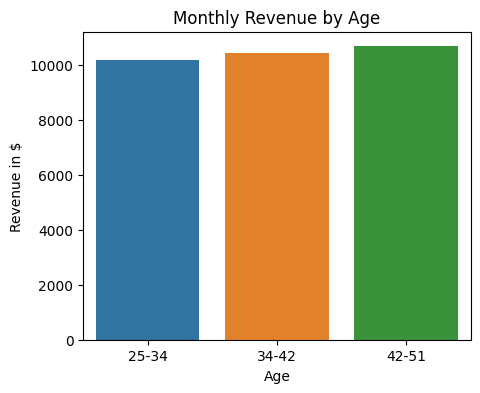

In [25]:
plt.figure(figsize=(5,4))
plt.title("Monthly Revenue by Age")
sns.barplot(x=rev_age.index, y=rev_age.values,
           hue=rev_age.index, legend=False)
plt.ylabel("Revenue in $")
plt.show()

In [26]:
df["Gender"].value_counts()

Gender
Female    1257
Male      1243
Name: count, dtype: int64

In [27]:
rev_gender = df.groupby("Gender")["Monthly Revenue"].sum()

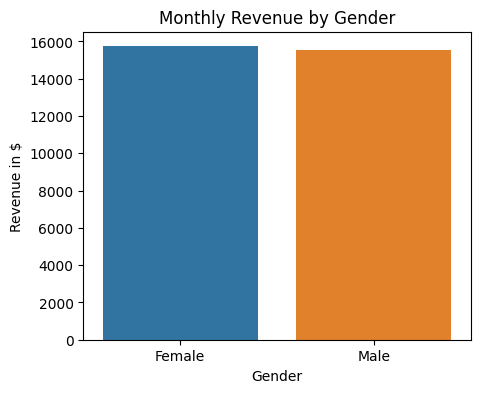

In [28]:
plt.figure(figsize=(5,4))
plt.title("Monthly Revenue by Gender")
sns.barplot(x=rev_gender.index, y=rev_gender.values,
           hue=rev_gender.index, legend=False)
plt.ylabel("Revenue in $")
plt.show()

In [29]:
df["Device"].value_counts()

Device
Laptop        636
Tablet        633
Smartphone    621
Smart TV      610
Name: count, dtype: int64

In [30]:
rev_device = df.groupby("Device")["Monthly Revenue"].sum()

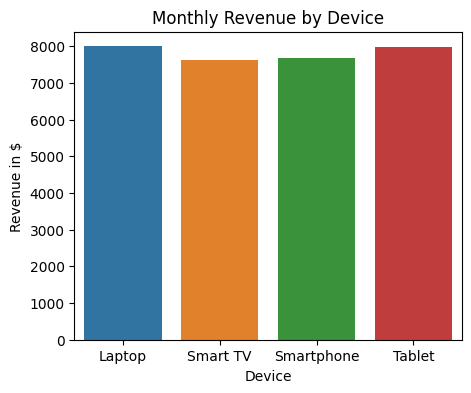

In [31]:
plt.figure(figsize=(5,4))
plt.title("Monthly Revenue by Device")
sns.barplot(x=rev_device.index, y=rev_device.values,
           hue=rev_device.index, legend=False)
plt.ylabel("Revenue in $")
plt.show()

In [32]:
join_date = pd.to_datetime(df["Join Date"])
last_payment = pd.to_datetime(df["Last Payment Date"])

In [33]:
duration = last_payment - join_date

In [34]:
df["Duration"] = duration

In [35]:
df.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Duration
0,1,Basic,10,2022-01-15,2023-10-06,United States,25-34,Male,Smartphone,629 days
1,2,Premium,15,2021-05-09,2023-06-22,Canada,34-42,Female,Tablet,774 days
2,3,Standard,12,2023-02-28,2023-06-27,United Kingdom,34-42,Male,Smart TV,119 days
3,4,Standard,12,2022-10-07,2023-06-26,Australia,42-51,Female,Laptop,262 days
4,5,Basic,10,2023-01-05,2023-06-28,Germany,25-34,Male,Smartphone,174 days


In [36]:
today = pd.to_datetime("2024-01-07")
last = pd.to_datetime("2024-01-01")
today-last

Timedelta('6 days 00:00:00')

In [37]:
df["Duration_Month"] = df["Duration"].dt.days//30

In [38]:
df.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Duration,Duration_Month
0,1,Basic,10,2022-01-15,2023-10-06,United States,25-34,Male,Smartphone,629 days,20
1,2,Premium,15,2021-05-09,2023-06-22,Canada,34-42,Female,Tablet,774 days,25
2,3,Standard,12,2023-02-28,2023-06-27,United Kingdom,34-42,Male,Smart TV,119 days,3
3,4,Standard,12,2022-10-07,2023-06-26,Australia,42-51,Female,Laptop,262 days,8
4,5,Basic,10,2023-01-05,2023-06-28,Germany,25-34,Male,Smartphone,174 days,5


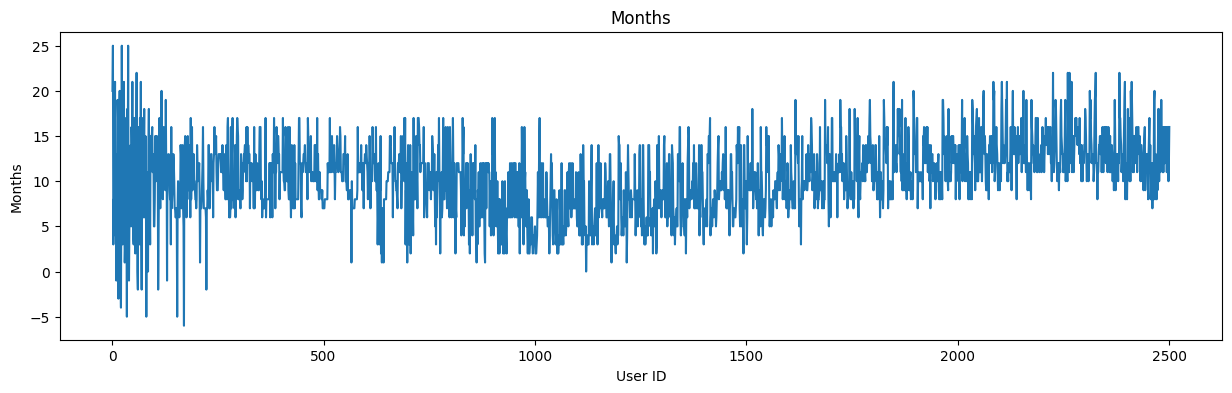

In [39]:
plt.figure(figsize=(15,4))
plt.title("Months")
sns.lineplot(x=df["User ID"], y=df["Duration_Month"])
plt.ylabel("Months")
plt.show()

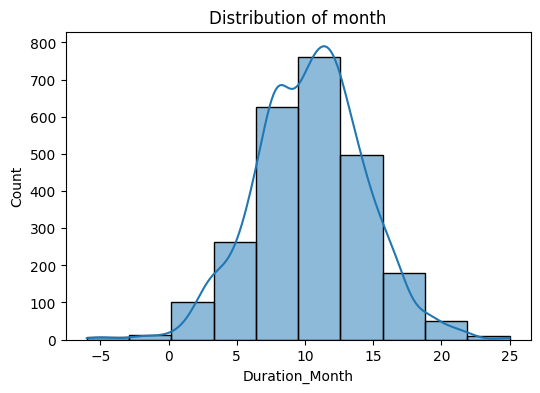

In [40]:
plt.figure(figsize=(6,4))
plt.title("Distribution of month")
sns.histplot(df["Duration_Month"], bins=10, kde=True)
plt.show()

In [43]:
popular_plan = df['Subscription Type'].value_counts().idxmax()
print(f"Most popular subscription plan: {popular_plan}")

# Average payment by subscription type
avg_payment = df.groupby('Subscription Type')['Monthly Revenue'].mean()
print("Average payment by subscription type:\n", avg_payment)


Most popular subscription plan: Basic


KeyError: 'Column not found: Payment_Amount'